In [56]:
try:
    spark.stop()
except:
    pass

# Using findspark to find automatically the spark folder
import findspark
findspark.init()

# import python libraries
import random

# initialize
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession 
spark = SparkSession.builder.master("local[*]").getOrCreate()


In [57]:
df = spark.read.option('header','true')\
.option('inferSchema','true').csv("stock_data/Stocks/a.us.csv")

In [58]:
print(df.columns)

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt']


In [59]:
df.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- OpenInt: integer (nullable = true)



In [60]:
df.head(5)

[Row(Date=datetime.datetime(1999, 11, 18, 0, 0), Open=30.713, High=33.754, Low=27.002, Close=29.702, Volume=66277506, OpenInt=0),
 Row(Date=datetime.datetime(1999, 11, 19, 0, 0), Open=28.986, High=29.027, Low=26.872, Close=27.257, Volume=16142920, OpenInt=0),
 Row(Date=datetime.datetime(1999, 11, 22, 0, 0), Open=27.886, High=29.702, Low=27.044, Close=29.702, Volume=6970266, OpenInt=0),
 Row(Date=datetime.datetime(1999, 11, 23, 0, 0), Open=28.688, High=29.446, Low=27.002, Close=27.002, Volume=6332082, OpenInt=0),
 Row(Date=datetime.datetime(1999, 11, 24, 0, 0), Open=27.083, High=28.309, Low=27.002, Close=27.717, Volume=5132147, OpenInt=0)]

In [61]:
len(df.columns), df.columns

(7, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'])

In [62]:
df.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+-------+
|summary|              Open|             High|               Low|             Close|            Volume|OpenInt|
+-------+------------------+-----------------+------------------+------------------+------------------+-------+
|  count|              4521|             4521|              4521|              4521|              4521|   4521|
|   mean| 27.85629564255693|28.27044198186248| 27.45248637469587|27.871356978544448|  3993502.99513382|    0.0|
| stddev|12.940880414056357|13.17599991326574|12.711735035627694|12.944388836423693|2665729.7355149505|    0.0|
|    min|            7.2231|           7.5139|            7.0878|            7.3238|                 0|      0|
|    max|             105.3|           109.37|            97.881|            107.32|          66277506|      0|
+-------+------------------+-----------------+------------------+------------------+------------------+-

In [63]:
df.select('Volume').show(5)

+--------+
|  Volume|
+--------+
|66277506|
|16142920|
| 6970266|
| 6332082|
| 5132147|
+--------+
only showing top 5 rows



In [64]:
Volume = df.select('Volume')

In [65]:
df1 = df.toPandas()

In [66]:
df1

,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-11-18,30.713,33.754,27.002,29.702,66277506,0
1,1999-11-19,28.986,29.027,26.872,27.257,16142920,0
2,1999-11-22,27.886,29.702,27.044,29.702,6970266,0
3,1999-11-23,28.688,29.446,27.002,27.002,6332082,0
4,1999-11-24,27.083,28.309,27.002,27.717,5132147,0
5,1999-11-26,27.594,28.012,27.509,27.807,1832635,0
6,1999-11-29,27.676,28.650,27.380,28.432,4317826,0
7,1999-11-30,28.350,28.986,27.634,28.480,4567146,0
8,1999-12-01,28.480,29.324,28.273,28.986,3133746,0
9,1999-12-02,29.532,30.375,29.155,29.786,3252997,0


In [67]:
from pyspark.sql.functions import col
from matplotlib import pyplot as plt
import seaborn as sns
from pyspark.ml.feature import VectorAssembler

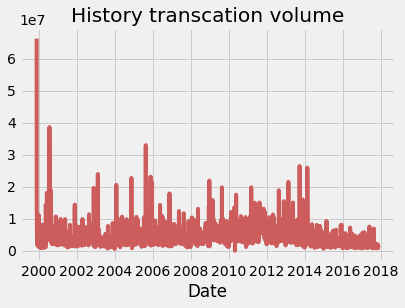

In [68]:
plt.style.use('fivethirtyeight')
_df = df1
plt.plot(_df.Date,_df.Volume, color = '#CD5C5C')
plt.xlabel('Date')
_=plt.title('History transcation volume')

In [69]:
from pyspark.ml.regression import LinearRegression

In [70]:
from pyspark.sql import functions as F

format = "yyyy-MM-dd'T'HH:mm:ss.SSSZ"
df2 = df.withColumn('Timestamp2', F.unix_timestamp('Date', format).cast('timestamp'))

In [71]:
df2.head()

Row(Date=datetime.datetime(1999, 11, 18, 0, 0), Open=30.713, High=33.754, Low=27.002, Close=29.702, Volume=66277506, OpenInt=0, Timestamp2=datetime.datetime(1999, 11, 18, 0, 0))

In [72]:
df2.select(F.dayofmonth('Timestamp2'))


DataFrame[dayofmonth(Timestamp2): int]

In [73]:
df2.head()

Row(Date=datetime.datetime(1999, 11, 18, 0, 0), Open=30.713, High=33.754, Low=27.002, Close=29.702, Volume=66277506, OpenInt=0, Timestamp2=datetime.datetime(1999, 11, 18, 0, 0))

In [74]:
from pyspark.sql.functions import to_timestamp
from pyspark.sql.functions import to_date
from pyspark.sql.functions import unix_timestamp

In [75]:
ts = df.select(unix_timestamp('Date').alias('timestamp'))

In [76]:
ts

DataFrame[timestamp: bigint]

In [77]:
from pyspark.sql.functions import split, explode, concat, concat_ws

In [78]:
ts.show(5)

+---------+
|timestamp|
+---------+
|942879600|
|942966000|
|943225200|
|943311600|
|943398000|
+---------+
only showing top 5 rows



In [79]:
df.show(5)

+-------------------+------+------+------+------+--------+-------+
|               Date|  Open|  High|   Low| Close|  Volume|OpenInt|
+-------------------+------+------+------+------+--------+-------+
|1999-11-18 00:00:00|30.713|33.754|27.002|29.702|66277506|      0|
|1999-11-19 00:00:00|28.986|29.027|26.872|27.257|16142920|      0|
|1999-11-22 00:00:00|27.886|29.702|27.044|29.702| 6970266|      0|
|1999-11-23 00:00:00|28.688|29.446|27.002|27.002| 6332082|      0|
|1999-11-24 00:00:00|27.083|28.309|27.002|27.717| 5132147|      0|
+-------------------+------+------+------+------+--------+-------+
only showing top 5 rows



In [80]:
new_df = df.join(ts, how='inner')

In [81]:
from pyspark.ml.feature import VectorAssembler
t = VectorAssembler(inputCols=['timestamp'], outputCol = 'features')

In [82]:
training = t.transform(ts)
training.toPandas().head()

,timestamp,features
0,942879600,[942879600.0]
1,942966000,[942966000.0]
2,943225200,[943225200.0]
3,943311600,[943311600.0]
4,943398000,[943398000.0]


In [83]:
df1['Volume'].head()

0    66277506
1    16142920
2     6970266
3     6332082
4     5132147
Name: Volume, dtype: int32

In [84]:
training.select('features')

DataFrame[features: vector]

In [85]:
type(training)

pyspark.sql.dataframe.DataFrame

In [86]:
type(df1)

pandas.core.frame.DataFrame

In [87]:
from pyspark.sql.functions import lit

df_ts = df.withColumn('timestamp', unix_timestamp('Date'))

In [88]:
df.show(5)

+-------------------+------+------+------+------+--------+-------+
|               Date|  Open|  High|   Low| Close|  Volume|OpenInt|
+-------------------+------+------+------+------+--------+-------+
|1999-11-18 00:00:00|30.713|33.754|27.002|29.702|66277506|      0|
|1999-11-19 00:00:00|28.986|29.027|26.872|27.257|16142920|      0|
|1999-11-22 00:00:00|27.886|29.702|27.044|29.702| 6970266|      0|
|1999-11-23 00:00:00|28.688|29.446|27.002|27.002| 6332082|      0|
|1999-11-24 00:00:00|27.083|28.309|27.002|27.717| 5132147|      0|
+-------------------+------+------+------+------+--------+-------+
only showing top 5 rows



In [89]:
df_ts.show(5)

+-------------------+------+------+------+------+--------+-------+---------+
|               Date|  Open|  High|   Low| Close|  Volume|OpenInt|timestamp|
+-------------------+------+------+------+------+--------+-------+---------+
|1999-11-18 00:00:00|30.713|33.754|27.002|29.702|66277506|      0|942879600|
|1999-11-19 00:00:00|28.986|29.027|26.872|27.257|16142920|      0|942966000|
|1999-11-22 00:00:00|27.886|29.702|27.044|29.702| 6970266|      0|943225200|
|1999-11-23 00:00:00|28.688|29.446|27.002|27.002| 6332082|      0|943311600|
|1999-11-24 00:00:00|27.083|28.309|27.002|27.717| 5132147|      0|943398000|
+-------------------+------+------+------+------+--------+-------+---------+
only showing top 5 rows



In [90]:
df_ts = df_ts.drop("OpenInt").drop("High").drop("Low").drop("Open").drop('Date').drop('Close')


In [91]:
train_df, test_df = df_ts.randomSplit(weights=[0.7, 0.3], seed=666)
train_df.cache()
test_df.cache()

DataFrame[Volume: int, timestamp: bigint]

In [108]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
t = VectorAssembler(inputCols=['timestamp'], outputCol = 'va_features')
vIndexer = VectorIndexer(inputCol="va_features", outputCol="features", maxCategories=24)
dt = LinearRegression(featuresCol="features", labelCol="Volume")
# training = t.transform(train_df).withColumn('label',train_df.Volume)
# training.toPandas().head()
dt_pipeline = Pipeline(stages=[t, vIndexer, dt])
dt_pipeline.getStages()
# lr = LinearRegression(maxIter=10)
# model = lr.fit(training)
model = dt_pipeline.fit(train_df)

In [ ]:
vIndexer = VectorIndexer(inputCol="va_features", outputCol="features", maxCategories=24)
dt = DecisionTreeRegressor(featuresCol="features", labelCol="Close", seed=1024)
dt_pipeline = Pipeline(stages=[vector, vIndexer, dt])
dt_pipeline.getStages()

In [109]:
prediction = model.transform(test_df)
prediction.columns
prediction.select("Volume", "prediction").show(50)

+-------+------------------+
| Volume|        prediction|
+-------+------------------+
| 734717|3544957.2471379396|
| 868050| 3686843.020286995|
| 885620| 3549351.736678252|
| 892531| 3602242.557217016|
| 966466|3494891.4555893764|
|1001279| 4510803.269676673|
|1013667| 3535226.591727247|
|1021118| 3554851.388022602|
|1045847| 3510435.654454441|
|1061695|3638346.6892885435|
|1064911|3585141.9766397574|
|1072288|3495519.2398094214|
|1078275|3589372.9807061004|
|1084793| 3503686.974088961|
|1095045| 4302542.394095811|
|1100047|3581375.2713194895|
|1102457| 4513471.352611863|
|1108055|3587182.2753549027|
|1122714| 3585612.814804791|
|1125771|3663608.4647263833|
|1130454| 4511901.892061751|
|1134547|3716813.1773751695|
|1139198| 4060838.929959652|
|1142375|3676955.4188212915|
|1142599| 4498097.178639728|
|1144970| 3591099.387311223|
|1150468| 3498036.916108559|
|1159043| 4301914.609875767|
|1159819|3893220.5432077236|
|1185191| 3502117.513538849|
|1188212|3626732.6812177175|
|1190302| 4500

In [111]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="Volume", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction)
rmse 

2497043.9573752973

In [63]:
from pyspark.sql.functions import to_timestamp
from pyspark.sql.functions import to_date
from pyspark.sql.functions import unix_timestamp

In [64]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Python Spark Regression").config("spark.some.config.option", "some-value").getOrCreate()
# 创建 DataFrame
# file = r'stock_data/Stocks/a.us.csv'
# hour_df = spark.read.format('csv').option("header", "true").load(file)
# hour_df.count()    # 17379
# hour_df.printSchema()
df = spark.read.option('header','true')\
.option('inferSchema','true').csv("stock_data/Stocks/a.us.csv")

In [65]:
df.show(5)

+-------------------+------+------+------+------+--------+-------+
|               Date|  Open|  High|   Low| Close|  Volume|OpenInt|
+-------------------+------+------+------+------+--------+-------+
|1999-11-18 00:00:00|30.713|33.754|27.002|29.702|66277506|      0|
|1999-11-19 00:00:00|28.986|29.027|26.872|27.257|16142920|      0|
|1999-11-22 00:00:00|27.886|29.702|27.044|29.702| 6970266|      0|
|1999-11-23 00:00:00|28.688|29.446|27.002|27.002| 6332082|      0|
|1999-11-24 00:00:00|27.083|28.309|27.002|27.717| 5132147|      0|
+-------------------+------+------+------+------+--------+-------+
only showing top 5 rows



In [66]:
# 删除不需要的字段
hour_df = df.drop("OpenInt").drop("High").drop("Low").drop("Open")
 
#将字符串类型转换成 double 类型, col 读取字段数据， cast("double") 转换成double
from pyspark.sql.functions import col
# hour_df = hour_df.select([col(column).cast("double").alias(column) for column in hour_df.columns])
hour_df.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)



In [67]:
hour_df.show(5)

+-------------------+------+--------+
|               Date| Close|  Volume|
+-------------------+------+--------+
|1999-11-18 00:00:00|29.702|66277506|
|1999-11-19 00:00:00|27.257|16142920|
|1999-11-22 00:00:00|29.702| 6970266|
|1999-11-23 00:00:00|27.002| 6332082|
|1999-11-24 00:00:00|27.717| 5132147|
+-------------------+------+--------+
only showing top 5 rows



In [68]:
from pyspark.sql.functions import lit

df_ts = hour_df.withColumn('timestamp', unix_timestamp('Date'))

In [69]:
df_ts = df_ts.drop("Date")
df_ts.show(5)

+------+--------+---------+
| Close|  Volume|timestamp|
+------+--------+---------+
|29.702|66277506|942879600|
|27.257|16142920|942966000|
|29.702| 6970266|943225200|
|27.002| 6332082|943311600|
|27.717| 5132147|943398000|
+------+--------+---------+
only showing top 5 rows



In [70]:
df_ts = df_ts.select([col(column).cast("double").alias(column) for column in df_ts.columns])
df_ts.printSchema()

root
 |-- Close: double (nullable = true)
 |-- Volume: double (nullable = true)
 |-- timestamp: double (nullable = true)



In [71]:
df_ts.show(5)

+------+-----------+----------+
| Close|     Volume| timestamp|
+------+-----------+----------+
|29.702|6.6277506E7|9.428796E8|
|27.257| 1.614292E7| 9.42966E8|
|29.702|  6970266.0|9.432252E8|
|27.002|  6332082.0|9.433116E8|
|27.717|  5132147.0| 9.43398E8|
+------+-----------+----------+
only showing top 5 rows



In [72]:
train_df, test_df = df_ts.randomSplit(weights=[0.7, 0.3], seed=666)
train_df.cache()
test_df.cache()

DataFrame[Close: double, Volume: double, timestamp: double]

In [104]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorIndexer, VectorAssembler, StringIndexer
from pyspark.ml.regression import DecisionTreeRegressor
featuresCols = df_ts.columns[1:3]
featuresCols

In [74]:
featuresCols = df_ts.columns[1:3]
vector = VectorAssembler(inputCols=featuresCols, outputCol="va_features")
# vector = VectorAssembler(inputCols=['timestamp'], outputCol = 'va_features')
vIndexer = VectorIndexer(inputCol="va_features", outputCol="features", maxCategories=24)
dt = DecisionTreeRegressor(featuresCol="features", labelCol="Close", seed=1024)
dt_pipeline = Pipeline(stages=[vector, vIndexer, dt])
dt_pipeline.getStages()
 


[VectorAssembler_4ee9cbf26871,
 VectorIndexer_7dd4c541bd1d,
 DecisionTreeRegressor_df3b8a977d41]

In [77]:
dtModel = dt_pipeline.fit(train_df)
prediction = dtModel.transform(test_df)
prediction.columns
prediction.select("Close", "prediction").show(50)

+------+------------------+
| Close|        prediction|
+------+------------------+
|7.7289|15.843691824817517|
|8.3034|15.843691824817517|
|8.3034|15.843691824817517|
|8.3907|15.843691824817517|
|8.6405|15.843691824817517|
|8.8158|15.843691824817517|
|8.8969|15.843691824817517|
|8.9844|17.585167774936068|
|9.0793|15.843691824817517|
|9.1127|15.843691824817517|
|9.1328|17.585167774936068|
|  9.14|15.843691824817517|
|9.2693|15.843691824817517|
|9.3144|15.843691824817517|
|9.3213|17.585167774936068|
|9.4299|15.843691824817517|
|9.4432|15.843691824817517|
|9.4848|15.843691824817517|
|9.4987|15.843691824817517|
|  9.52|15.843691824817517|
| 9.546|15.843691824817517|
| 9.553|15.843691824817517|
| 9.571|15.843691824817517|
| 9.586|15.843691824817517|
| 9.586|15.843691824817517|
| 9.593|17.585167774936068|
| 9.638|17.585167774936068|
| 9.694|15.843691824817517|
| 9.694|15.843691824817517|
| 9.896|15.843691824817517|
| 9.896|17.585167774936068|
| 9.944|15.843691824817517|
| 9.951|17.585167774

In [76]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="Close", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction)
rmse 

4.720916921972006